In [3]:
# Notebook by C. Herdman & P. Hess
# January 2021

import numpy as np
import matplotlib.pyplot as plt

# Simple Harmonic Oscillator

To start our discussion of oscillations, we'll begin with what you could fairly describe as **the most important problem in all of physics**: *the simple harmonic oscillator* (SHO). We'll focus on the *mass-on-a-spring* model of a SHO, but it shows up all over the place in physics in many forms. Physics classes you'll likely encounter the SHO include: 109, 110, 111, 202, 212, 221, 241, 301, 302, 330, 340, 350, 401...oh and 230!

## References for simple harmonic motion:

*   Wolfson, *Essential Univerisity Physics*, Chap. 13
*   [OpenStax *University Physics*, Chap. 15](https://openstax.org/books/university-physics-volume-1/pages/15-1-simple-harmonic-motion)
* Taylor, *Classical Mechanics* Chap. 5 (more advanced reference)

## *Mass-on-a-spring* as a simple harmonic oscillator 

Consider a mass $m$ on a horizontal frictionless surface, attactched to a masselss spring with spring constant $k$. We'll define $x=0$ to be the *equilibrium* position of the mass, and we'll only consider motion 1D along the x-axis; $x$ therefore represents the displacment from the equilibirum position. The spring provides a **restoring force** that tends to pull the mass back toward the origin:

$$\textbf{Restoring force:} \qquad \vec{F}_{\text{res}} = - k x \hat{i} $$

Since the vertical forces cancel, the net force is equal to $ \vec{F}_{\text{res}}$, and we can use Newton's 2nd law to write:

$$\textbf{Newton's 2nd Law:} \qquad  \vec{F}_{\textrm{Net}} = - k x \hat{i} = m \vec{a}$$

Since we're only considering motion along the x-axis, we can solve for the x-component of the accleration:

$$ a_x = -\frac{k}{m}x $$

We now can write Newton's 2nd Law as a *differential equation*, by writing acceleration as the 2nd derivative of position: $a_x = d^2x/dt^2$:

$$ \frac{d^2 x}{dt^2} = - \omega_0^2 x\left(t\right), \qquad \omega_0 \equiv \sqrt{k/m}$$

where we've defined the constant *angular frequency* $\omega_0$ as shown. In the form shown, Newton's 2nd Law becomes an equation for the 2nd derivative of $x$ (the acceleration) in terms of $x$. Often we equilvalently write this *extremely important* differential equation as:

$$\textbf{Differential Equation:} \qquad \frac{d^2 x}{dt^2} + \omega_0^2 x\left(t\right) = 0 $$

We now just need to solve this differential equation to find $x(t)$. The best way (read *physicist's way*) to solve a differential equaiton is to *guess* the form of the solution, and check to see if you're right by taking a few derivatives. This differential equation has a solution of the form:

$$\textbf{General solution:} \qquad x\left(t\right) = A \cos \left( \omega_0 t\right) + B \sin \left( \omega_0 t\right) $$

where $A$ and $B$ are any two constants. Go ahead and take two time derivatives and you'll find that the differential equaiton is solved by any choices of $A$ & $B$. To determine what $A$ and $B$ are, we must know the *intial conditions*: $x(t=0)$ and $v_x (t=0)$. Unless otherwise noted, in this assignment we'll assume the mass is released from rest from position $x_0$:

$$ x\left(t=0\right) = x_0, \qquad v_x \left(t=0\right) \equiv \frac{dx}{dt}\vert_{t=0} = 0 $$

For these intial conditions, the general solution simplifies to the particular solution:

$$\textbf{Position when released from rest:} \qquad  x\left(t\right) = x_0 \cos \left( \omega_0 t \right) $$

By taking a time derivative we find the velocity (when the mass is released from rest):

$$\textbf{Velocity when released from rest:} \qquad  v_x\left(t\right) \equiv \frac{dx}{dt} = -x_0 \omega_0 \sin \left( \omega_0 t \right) $$

In [4]:
# Analytical solution to the SHO
def SHO_analytic( omega_0, x_0, t):
    '''
    Returns the analytical solution for the position and velocity 
    of a simple harmonic released from rest.

    Returns: (x, v_x)

    Parameters:
    omega_0 - the natural frequency sqrt(k/m) [1/s] - float
    x0 - initial position [m] - float
    t - time [s] - float or NumPy array
    '''
    # position as a funciton of time
    x = x_0 * np.cos( omega_0 * t )

    # velocity as a funciton of time                       
    v_x = (-1.0) * omega_0 * x_0 * np.sin( omega_0 * t )  
    
    return (x, v_x)

### **Problem 1**
Compute the analytical solutions for $x(t)$ and $v_x(t)$ for $k = 4.0~\textrm{N/m}$, $x_0 = 10.0~\textrm{m}$ and three different values of the mass: $m \in\{2.0~\textrm{kg}, 4.0~\textrm{kg}, 8.0~\textrm{kg} \}$.
* Make two plots, one each for $x(t)$ and $v_x(t)$ and put curves for all three masses on each. 
* How do the period and amplitude of the oscillations of postion and velocity change with mass?

### **Problem 2**
Plot the kinetic energy, potential energy, and total energy of the analytical solution. Pick any $m$, $k$ and $x_0$ you'd like! Besure to show several oscillations in your plot.

* Describe what happens to the kinetic, potential and total energies as a function of time.

## Phase space orbit of an oscillator

Because of the peridic motion of an oscillator, it can be useful to plot the trajectory of an oscillator in a compact but abstract representation known as its *phase space orbit*. At any instant in time we can describe the trajectory of the mass by its position and velocity. Instead of using the velocity, we'll use the *momentum* to represent the mass's instantaneous motion: 

$$\textbf{momentum:}\quad p_x \equiv m v_x $$

So at all points in time the trajectory of the mass is described by the pair of numbers:

$$\textbf{phase space represntation}: \bigl( x(t), p_x(t) \bigr)$$

We can then plot the *phase space orbit* of the particle on a 2D parametric plot, by using $x(t)$ for the x-axis and $p_x(t)$ on the y-axis. 

For example:

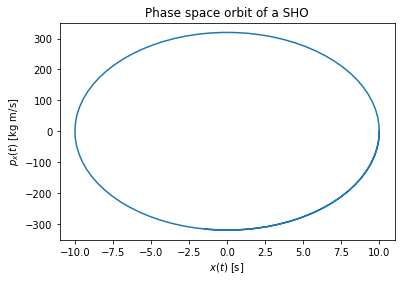

In [5]:
# Plot the phase space orbit of a SHO

# Parameters: (We'll use capital letters for constants)
OMEGA_0 = 4.0     # angular frequncy [1/s]
M = 8.0           # mass [kg]
X_0 = 10.0        # initial position [m]
T_MAX = 2.0       # maximum time [s]

# Create array of times
t_analytic = np.linspace(0.0, T_MAX, 100 )

# Compute trajectories
(x_analytic, vx_analytic) = SHO_analytic( OMEGA_0, X_0, t_analytic)

# Compute the momenum
px_analytic = M * vx_analytic

# Make Phase space plot
plt.plot( x_analytic, px_analytic )
plt.xlabel( r'$x(t)$ [s]' )
plt.ylabel( r'$p_x(t)$ [kg m/s]' )
plt.title( 'Phase space orbit of a SHO');

### **Problem 3**
* Plot the phase space oribits for $m= 8.0~\text{kg}$, $k=4.0~\text{N/m}$ and three different intial positions $x_0 \in \{2.0~\text{m}, 4.0~\text{m}, 8.0~\text{m}\}$ all on one plot.
  * Describe how the phase space plots vary with $x_0$.

* Plot the phase space oribits for $m= 8.0~\text{kg}$, $k=2.0~\text{N/m}$ $x_0=8.0~\text{m}$ and three different intial spring constants: $k \in \{2.0~\text{N/m}, 4.0~\text{N/m}, 8.0~\text{N/m}\}$ all on one plot
  * Describe how the phase space plots vary with $k$.

* How do you think your the shape of your phase space orbits would change if you gave the mass an intial kick, rather than starting it from rest?

## Solving the SHO Numerically

Now we'll try to find the trajectory of the SHO numerically, first using the Euler algorithm.

In [6]:
# Euler's algorithm applied to the simple harmonic oscillator
def SHO_Euler( omega_0, x_0, t_max, dt):
    '''
    Returns the numerical solution for the position and velocity 
    of a simple harmonic released from rest using the Euler algorithm.
    
    Returns: (t, x, v)

    Parameters:
    omega_0 - the natural frequency sqrt(k/m) (1/s) - float
    x0 - initial position (m) - float
    t_max - the maximum time (s) - float
    dt - the time step for Euler (s) - float
    '''
    
    # Compute the time steps needed
    t_steps = int(np.ceil(t_max/dt))

    # Create the position & velocity arrays
    t_arr = np.zeros(t_steps)
    x_arr = np.zeros(t_steps)
    vx_arr = np.zeros(t_steps)

    # Initialize the arrays
    t_arr[0] = 0.0    # We'll start at t=0
    x_arr[0] = x_0    # Initial position
    vx_arr[0] = 0.0   # Assume the mass is released from rest
    
    # Main loop for the Euler algorithm
    for i in range(t_steps - 1):
        t_arr[i + 1] = t_arr[i ] + dt
        x_arr[i + 1] = x_arr[i] + vx_arr[i] * dt  # update the position
        a = (-1.0) * (omega_0 ** 2.0) * x_arr[i]  # compute the accleration
        vx_arr[i + 1] = vx_arr[i] + a * dt        # update the velocity
    
    return (t_arr, x_arr, vx_arr)

In [9]:
# Compute a SHO trajectory using Euler's algorithm

# Parameters
OMEGA_0 = 4.0     # angular frequncy [1/s]
X_0 = 1.0         # initial position [m]
T_max = 5.0       # maximum time [s]
DT = 0.1         # Euler time step [s]

# Compute the Euler soltution
(t_euler, x_euler, vx_euler) = SHO_Euler( OMEGA_0, X_0, T_max, DT)

# Compute the analyticial solution
t_analytic = np.copy(t_euler)  # We'll use the same times as Euler
(x_analytic, vx_analytic) = SHO_analytic( OMEGA_0, X_0, t_analytic)

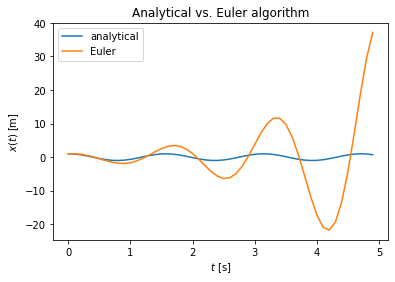

In [10]:
# Plot the analytical and Euler trajectories for the SHO 
plt.plot( t_analytic, x_analytic , label='analytical')
plt.plot( t_euler, x_euler , label='Euler')
plt.xlabel( r'$t$ [s]' )
plt.ylabel( r'$x(t)$ [m]' )
plt.title( 'Analytical vs. Euler algorithm')
plt.legend();

Clearly there's problem with using Euler's algorithm for oscillatory problems! Try a few different time steps to see how that affects the Euler solution. The fundamental issue is that the Euler-algorithm has an *instability*--using a smaller time step won't fix this instability, merely hide it temporarily.

## Euler-Cromer Algorithm

For oscillitory problems, we'll use a more stable variant of Euler's algorithm known as the Euler-Cromer algorithm. This algorithm is very similar to Euler algorithm, except the finite difference updates to the velocity and position are: 

$$\begin{align}
v_x(t + \Delta t) &= v_x(t) + a_x(t)/m \Delta t \\
x(t + \Delta t) &= x(t) + v_x(t + \Delta t) \Delta t
\end{align}$$

Notice that Euler-Cromer uses $v_x(t + \Delta t)$  to compute $x(t + \Delta t)$ wheras Euler uses $v_x(t )$; therefore we need to compute $x(t + \Delta t)$ *after* $v_x(t + \Delta t)$. Otherwise the method is identical to the Euler algorithm. 

### **Problem 4**
Implement the Euler-Cromer Method to find $x(t)$ and $v_x(t)$ for the SHO.
* Plot analytical & Euler-Cromer for $\omega_0 = 2.0~\text{s}^{-1}$, $x_0=1.0~\text{m}$, $dt = 0.05~\text{s}$.
* Plot the error in $x(t)$ from Euler-Cromer as compared to the analytical solution several values of $dt$.

# Damped Harmonic Oscillator

We started by assuming our mass was on a frictionless surface. Now we'll make our model more realistic by introducing dissipation into our oscillator. We'll consider a velocity dependent damping force that acts in the direction opposite to the velocity with a magnitude that is proportional to the speed:

$$\textbf{Damping force:}\quad \vec{F}_{\rm{damp}} = - b \vec{v} $$

where $b$ is the damping constant with units of $N s/m$.
The net force is the sum of the restoring force and the damping force:

$$ \vec{F}_{\rm{Net}} = \vec{F}_{\rm{res}} + \vec{F}_{\rm{damp}} $$

Considering motion only along the x-axis, Newton's 2nd law reads:
$$\textbf{Newton's 2nd Law:}\quad m a_x = -k x- b \frac{dx}{dt} $$

Notice that now the acceleration depends both on the position *and velocity* of the mass. Replacing the acceleration by a 2nd derivative gives use the differential equation:

$$ \frac{d^2 x}{dt^2} = - \omega_0^2 x\left(t\right) - 2 \beta \frac{dx}{dt} $$

where we've defined the *damping rate* $\beta$ which has units of 1/s:

$$\textbf{Damping rate:}\quad \beta \equiv \frac{b}{2 m} $$

Equivalently, we can write the diffential equation for Newton's 2nd Law in the form:

$$\textbf{Differential Eqn.:}\quad \frac{d^2 x}{dt^2} + 2 \beta \frac{dx}{dt} + \omega_0^2 x\left(t\right) = 0$$

This is another example (along with the SHO) of what is known as a *homogeneous differential equation*. While it is substantially harder to solve analytically than the differntial equation for the SHO, we can still make progress analytically.

## Analytical solution for *underdamping*

Here we'll consider the specific case where $\beta < \omega_0 $: this is known as *underdamping*. The particular solution to this differential equation when the mass is released from rest from position $x_0$ is:

$$\textbf{Underdamping (released from rest):} \quad x\left(t \right) = x_0 e^{-\beta t} \cos\left( \omega_1 t\right), \qquad \beta < \omega_0$$

where we've defined a new frequency $\omega_1$:

$$\textbf{Damped frequency:}\quad \omega_1 \equiv \sqrt{\omega_0^2 - \beta^2} $$

How do we know this is the solution to the differential equation? We're physicists--we've guessed the solution and now you can check for yourself by taking a few derivatives!

### **Problem 5**
Consider the anaylitical solution for the damped osciallator for $\beta < \omega_0$. Plot $x(t)$ vs. $t$ for four different values:
$$\beta \in\{ 0.01\omega_0, 0.1\omega_0, 0.5\omega_0, 0.9\omega_0\}$$
 with a single value of $x_0$ and $\omega_0$ of your choosing.

### **Problem 6**
Implement the Euler-Cromer method for the damped harmonic oscillator. 
* Plot $x(t)$ vs. $t$ for both the analytical and Euler-Cromer solution for $\beta = 0.1 \omega_0$
* On a separate plot, plot the error in your numerical solution as compared to the analytical solution: 
$$ \delta x(t) = x_{numerical}(t)-x_{analytical}(t) $$

### Beyond Underdamping

While you can make progress with analytical methods for $\beta \geq \omega_0$, we're going to stick with numerical methods to study this regime.

### **Problem 7**
Use Euler-Cromer to find the $x(t)$ and $v(t)$ for $\beta \in \{ 0.01\omega_0,~0.1\omega_0,~\omega_0,~2\omega_0,~4\omega_0\}$. For each $\beta$ value:
* Plot $x(t)$
* Plot the total energy
* Plot the phase space orbits

Describe the behavior you see in each of your plots for each $\beta$ value.
* $\beta = \omega_0$ is known as *critical damping*--what is special about a critically damped system? How does this to compare to the *overdamped* regime: $\beta > \omega_0$?

### Overdamping

In the overdamped regime $\beta > \omega_0$, you should find that $x(t)$ can approximately be described by a decaying exponential:

$$ \beta > \omega_0: \quad x(t) \simeq x_0 e^{-t/\tau} $$

where $\tau$ is the decay time (with units of seconds). Consider consider the time $t = \tau$

$$ x(\tau) = x_0 e^{-1} \Rightarrow \frac{x(\tau)}{x_0} = \frac{1}{e}$$

Therefore we can estimate $\tau$ by finding the *$e$-folding time*, the time at which the displacment is $1/e \simeq 0.37 $ of the initial displacement.

### **Problem 8**
* Use Euler-Cromer to compute $x(t)$ for the following $\beta$ values in the overdamped regime: $\beta \in \{ 1.1\omega_0, 2.0\omega_0,~\omega_0,~4.0\omega_0,~8.0\omega_0\}$. 
* For each $\beta$ value esimate the decay time $\tau$ by finding the $e$-folding time.
* Plot $\tau$ as a funtion of $\beta$ for these values of $\beta$.

## **Data Analysis Extension**: Critical Damping & Overdamping

The general analytical solution for critical damping has the form:

$$\textbf{Critical damping}: x(t) = Ae^{-\beta t} + B t e^{-\beta t}, \qquad \beta = \omega_0 $$

The general analytical solution for overdamping has the form:

$$ \textbf{Overdamping}: x(t) = Ae^{- t/\tau_1} + B e^{-t/\tau_2}, \qquad \beta > \omega_0 $$

where $\tau_1$ and $\tau_2$ are determined by $\omega_0$ and $\beta$:

$$\frac{1}{\tau_1} \equiv \beta - \sqrt{\beta^2 - \omega_0^2} \qquad
\frac{1}{\tau_2} \equiv \beta + \sqrt{\beta^2 - \omega_0^2} $$


### ***Data Analysis Challenge Problem 9***
* Numerically compute $x(t)$ for $\beta=\omega_0$. Fit your data to determine the $A$ & $B$ parameters and confirm agreement with analytical soltution.
* Numerically compute $x(t)$ for several values of $\beta>\omega_0$. Fit your data to determine the $A$, $B$, $\tau_1$, and $\tau_2$  parameters and confirm agreement with analytical soltution.

*Hint*: You may want to use [sp.curvefit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) or another curve fitting package.


# **Physics Extension:** Driven Damped Harmonic Oscillator

Now we're going to add a sinusoidal *driving* force to our damped harmonic oscillator:

$$\textbf{Driving force}: \vec{F}_{\textrm{drive}} = F_0 \cos( \omega_d t) \hat{i}$$

In other words, now something is periodically pushing and pulling on the mass with frequency $\omega_d$ with a force of amplitude $F_0$. Notice the driving force is indepedent of the position and velocity of the mass. The net force on our oscillator is:

$$\vec{F}_{\textrm{Net}} = \vec{F}_{\textrm{res}} + \vec{F}_{\textrm{damp}} + \vec{F}_{\textrm{drive}} $$

Newton's 2nd law in differential equation form becomes:

$$\textbf{Newton's 2nd Law:}\quad\frac{d^2 x}{dt^2} = - \omega_0^2 x\left(t\right) - 2 \beta \frac{dx}{dt} + f_0 \cos\left(\omega t\right) $$

where we've defined the constant $ f_0 \equiv F_0/m $. We can re-write out differential equation in a standard form:


$$\textbf{Diff. Eqn. for driven oscillator:} \quad \frac{d^2 x}{dt^2} + 2 \beta \frac{dx}{dt} + \omega_0^2 x\left(t\right)  = f_0 \cos\left(\omega t\right) $$

This is what is known as a *non-homogenous differential equation* because there is term that is independent of $x(t)$ and its derivatives.

### ***Extension Problem 10***
Implement the Euler-Cromer Method for the driven damped harmonic oscillator. 
* Compute the trajectory of the oscillator for 
  * $\beta = 0.1 \omega_0$
  * $f_0 = x_0 \omega_0^2 $ 
  * $\omega_d =\{0.1 \omega_0, 0.5 \omega_0, \omega_0, 2.0 \omega_0 \}$ 
* Make three plots:
  1. Position vs. time
  2. Energy vs. time
  3. Phase space orbits

  Include all 4 values of $\omega_d$ on each plot. 
* Describe the behavior you see for each $\omega_d$.
* The *resonant frequency* of a damped oscillator is
$$\omega_r = \sqrt{\omega_0^2 - 2\beta^2} $$
Illustrate and describe the behavior of the oscillator as $\omega_d$ approaches $\omega_r$.

# **Physics Extension**: Anharmonic oscillators, non-linear dynamics & chaos! #

The harmonic oscillators (whether damped, driven or not) often *approximatly* describes the dynamics of oscillatory motion of a real system when small displacements are made from the equilibrium position. 

For example, consider the simple pendulum, which is discussed in [OpenStax *University Physics* Chapter 15](https://openstax.org/books/university-physics-volume-1/pages/15-4-pendulums). Using Netwon's 2nd law for torques and angular acceleration, you find that the angle of the pendulum from vertical $\theta(t)$ is described by the differential equation:

$$\textbf{Simple pendulum:}\quad \frac{d^{2} \theta}{d t^{2}} = - \omega_0^2 \sin \theta $$

Where the frequency $\omega_0$ is determined by the gravitational accleration and the length of the pendulum: $ \omega_0 = \sqrt{\frac{ g}{L}}$. Now let's assume we relase the pendulum from rest at a small angle $\theta_0 \ll 1$. Using the Taylor series approximation for sine, we can write:

$$\sin \theta \simeq \theta \qquad \theta \ll 1$$

Plugging this approximation back into the differntial equation, we have:

$$\textbf{Harmonic approximation}\quad \frac{d^{2} \theta}{d t^{2}} \simeq - \omega_0^2 \theta $$

Notice that for small angles, the pendulum is approximately described as a simple harmonic oscillator! But what about for larger angles where this approximation fails?


### ***Extension Problem 11***
Implement the Euler-Cromer algorithm for the simple pendulum. 
* Make three separte plots of $\theta(t)$ for the simple pendulum with $\theta_0 = \{(0.01)\pi, (0.1)\pi, \pi/4\}$. 
* For each value of $\theta_0$, aslo plot $\theta(t)$ using the analytical expression under harmonic approximation for the corresponding $\theta_0$ value.

Now we'll consider the dynamics of the simple pendulum for larger angles were the harmonic oscillator fails.

### ***Extension Problem 12***
Compute $\theta(t)$ for the simple pendulum with $\theta_0 = \{(0.1)\pi, \pi/4, \pi/2, (0.9)\pi\}$.
* Plot the ratio $\theta(t)/\theta_0$ for each $\theta_0$ value on the same plot
* What is happening to the period of oscillation as $\theta_0 \rightarrow \pi$? Explain this physic[link text](https://)ally!
    * **Challenge Problem:** Numerically determine the period of oscillation from your data for $\theta(t)$. Plot the period as a function of $\theta_0$. *Hint* If you've worked with Fourier transforms (e.g. in PHYS 212), try using [numpy.fft](https://numpy.org/doc/stable/reference/routines.fft.htmlhttps://numpy.org/doc/stable/reference/routines.fft.html).

## Driven, damped simple pendulum: Chaos!

Now we're going to add a damping and driving force to our pendulum. The corresponding differential equation is now:

$$ \frac{d^2 \theta}{dt^2} = -\omega_0^2 \sin \theta - 2 \beta \frac{d \theta}{dt} + f_0 \cos(\omega_d t) $$

### ***Extension Problem 13***
* Implement the Euler-Cromer method for the driven, damped simple pendulum. 
* Compute the trajectories for $f_0 = \{ 0.7~\text{s}^{-1}, 1.1~\text{s}^{-1}\}$ with the other parameters fixed as follows:
$\quad\theta_0 = 1.0,~\text{rad} \quad \beta = 0.25,~\text{s}^{-1}, \quad \omega_0 = 1.0,~\text{s}^{-1},\quad \omega_d = 0.6,~\text{s}^{-1}$
 * Plot $\theta(t)$ and $d\theta/dt$ vs. t for both values of driving frequency. Discuss the difference in the behavior you see--are they both periodic motion?
* Plot the phase space trajectories for these two sets of conditions and describe the difference. Try a few more values of $f_0$ and discuss what you find!

### ***Extension Problem 12***
For the same set of parameters as above, starting the pendulum from the following 2 sets of intial conditions:
* Case a: $\quad \theta(t=0) = 0.0, \quad d \theta/dt |_{t=0} = 0.0$
* Case b: $\quad \theta(t=0) = 0.0, \quad d \theta/dt |_{t=0} = 0.01~s^{-1}$

Notice that in the 2nd case, the pendulum is started with a very small initial velocity. 
* Plot the trajectory for both intial conditions for both values of $f_0$ on separate plots.
* Plot the absolute value of the difference in the angular positions as a function of time $|\omega_a(t) - \omega_b(t)|$ for both values of $f_0$ on a log-linear plot. Describe the difference you see. *Hint*: You should see **chaotic** behavior!

## Algorithm Extensions
Check out these extensions to get a better understanding of the performance of the Euler method for solving ODEs, and to experiment with some alternate ways of solving these same problems. 

### ***Algorithm Extension Problem 14***

**Quantifying error with no exact solution**

Test for your convergence in the Euler and Euler-Cromer algorithm simulations of an oscillator. Repeat your simulation many different times with the same initial conditions, but by changing the step size $\Delta t$. You can then compare a represntative quantity, say $x(t_f, \Delta t)$, by taking the difference in that quantity between simulations with different $\Delta t$. In fact, you probably want to "normalize" the quantity by compting

$$\Delta x_{err} = \left| \frac{x(t_f, \Delta t_2) - x(t_f, \Delta t_1)}{\Delta t_2 - \Delta t_1} \right|$$

You should see that $\Delta x_{err}$ tends to zero as $\bar{\Delta t} = (\Delta t_2 + \Delta t_1)/2$ gets small, giving you confidence that small step sizes allows you simulation to converge to a solution that is at least consistent.

Produce a plot of the difference in $\Delta x_{err}$ versus $\bar{\Delta t}$ to demonstrate convergence in your simulations of the the SHO (or damped or driven SHO)

### ***Algorithm Extension Problem 15***
**An improved ODE solve: Heun's Method**

Solve one of the above oscillator problems (over your choice) by implementing [*Heun's Method*](https://en.wikipedia.org/wiki/Heun%27s_method). See Module 2 for brief description of the algorithm.

* Compute $x(t)$ for serveral values of $dt$ for both Euler-Cromer and Heun's Method. Compare the scaling of the systemic error due to finite $dt$ in both methods and discuss.

### ***Algorithm Extension Problem 16***
**Using SciPy differential equation solvers**

This powerful algorithmic machinery for solving ordinary differntial equations, or initial value problems (IPVs), is built into the SciPy package already. Use the [`scipy.integrate.solv_ipv` [doc]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) function, solve an oscillation problem of your choice. You will see that this function contains an option to use several different differential equation solving algorithms. Look up a bit of information about one of those methods, and write a few sentences describing what you learned in a Markdown cell. 